# Analiza zbioru danych - Iris


In [21]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [22]:
df = pd.read_csv("../dbs/iris/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
# Liczba klas i ich rozkład
class_distribution = df['Species'].value_counts()
class_distribution

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [24]:
# Liczba instancji
instance_count = df.shape[0]
instance_count

150

In [25]:
# Liczba i nazwy atrybutów
attribute_count = df.shape[1] - 1  # Odejmujemy 1, ponieważ jedna kolumna to etykieta klasy
attribute_names = df.columns[:-1].tolist()  # Pomijamy kolumnę 'Species'
attribute_count, attribute_names

(5, ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

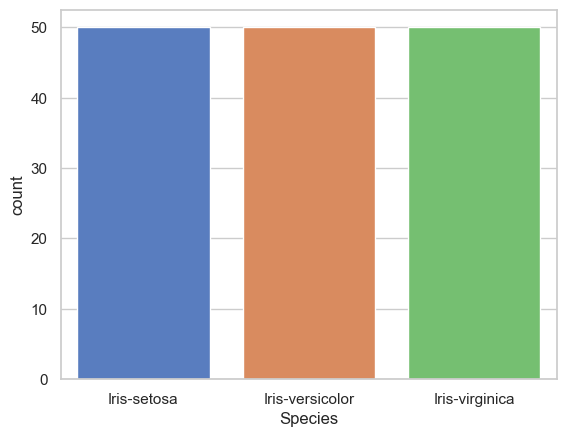

In [26]:
# sns.color_palette("mako", as_cmap=True)
# sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
sns.set_theme( style="whitegrid", palette="muted",)
sns.countplot(x='Species', data=df, hue='Species')
plt.show()

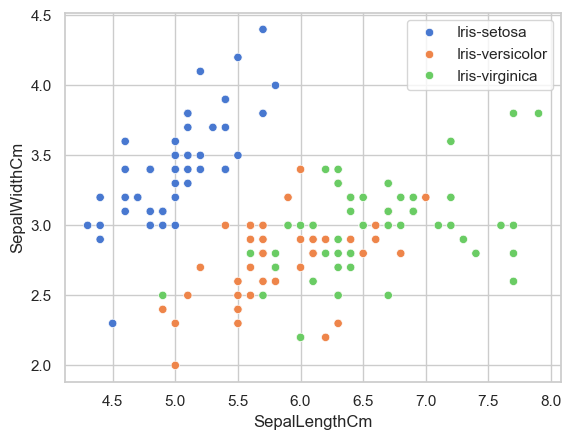

In [27]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df, )
 
plt.legend()
plt.show()

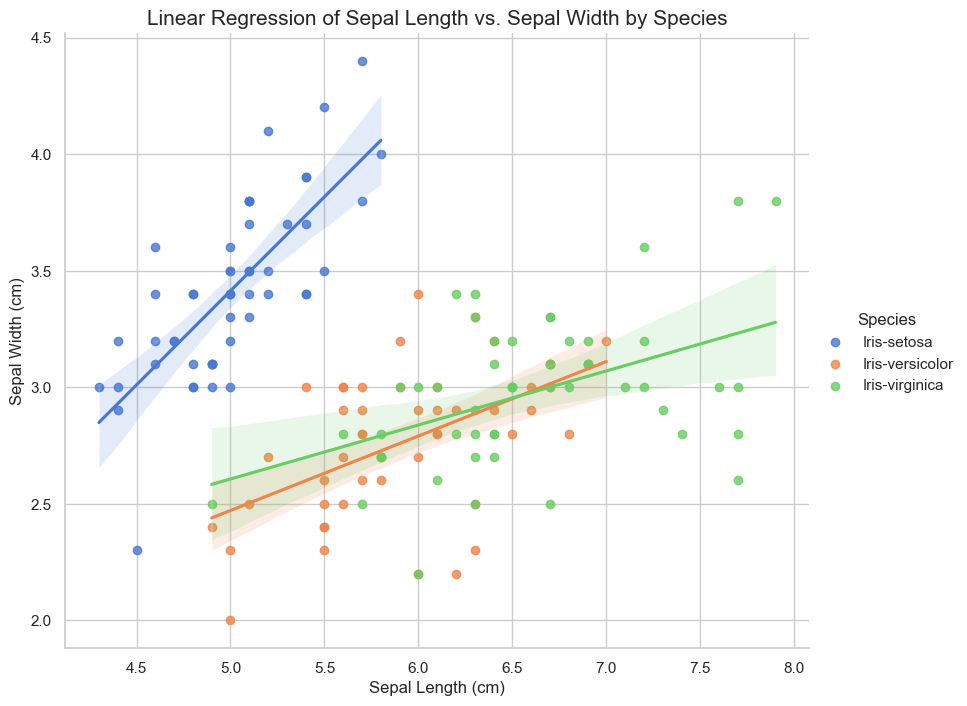

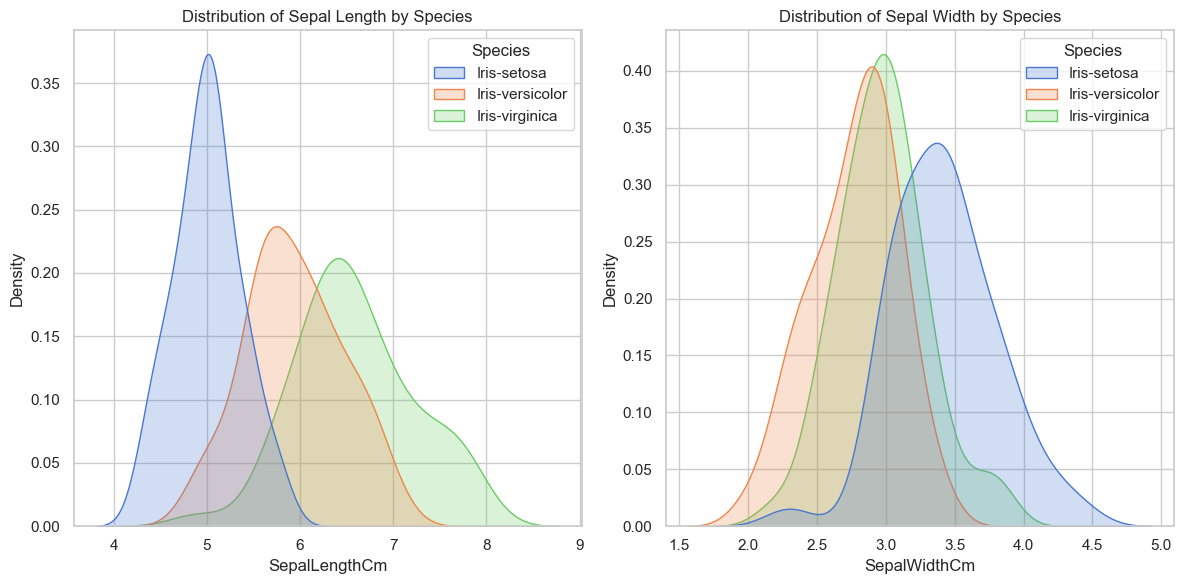

In [28]:
sns.lmplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df, height=7, aspect=1.2)

plt.title("Linear Regression of Sepal Length vs. Sepal Width by Species", fontsize=15)
plt.xlabel("Sepal Length (cm)", fontsize=12)
plt.ylabel("Sepal Width (cm)", fontsize=12)
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x="SepalLengthCm", hue="Species", fill=True)
plt.title('Distribution of Sepal Length by Species')
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x="SepalWidthCm", hue="Species", fill=True)
plt.title('Distribution of Sepal Width by Species')

plt.tight_layout()
plt.show()

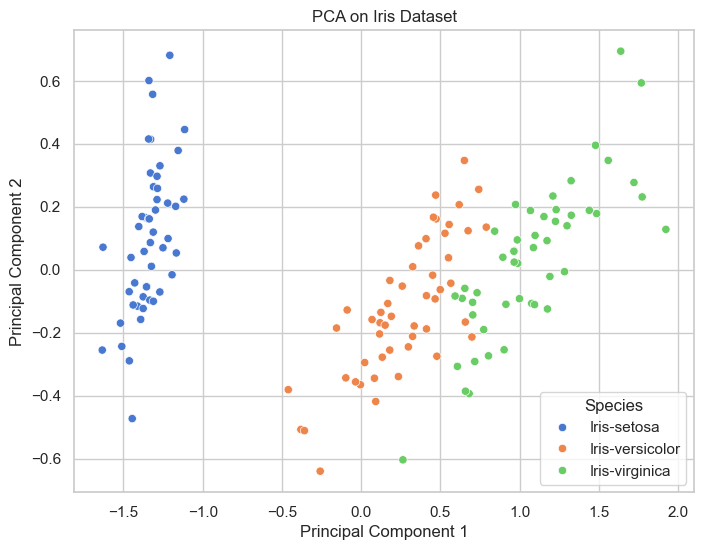

In [34]:
# Przygotowanie danych dla PCA
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = df.loc[:, features].values

# Normalizacja danych przed zastosowaniem PCA
x = (x - x.mean()) / x.std()

# Zastosowanie PCA do redukcji wymiarów do 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# Tworzenie DataFrame dla wyników PCA
pca_df = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])
pca_df['Species'] = df['Species']

# Rysowanie wykresu wyników PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Principal Component 1", y="Principal Component 2", hue="Species", data=pca_df)
plt.title('PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

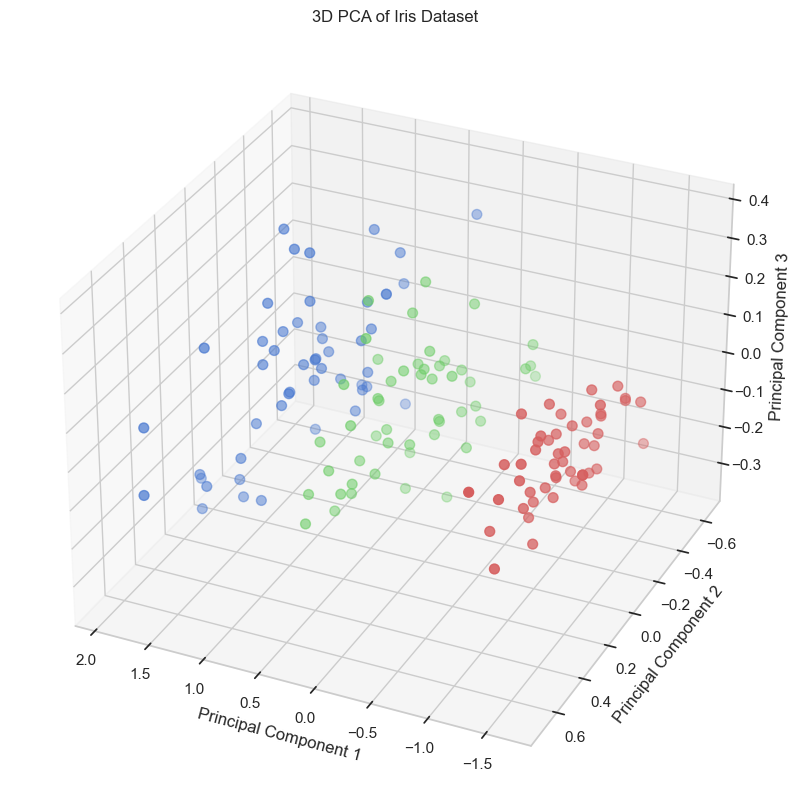

In [30]:
from mpl_toolkits.mplot3d import Axes3D

# PCA do redukcji do 3 głównych komponentów
pca_3d = PCA(n_components=3)
principalComponents_3d = pca_3d.fit_transform(x)
principalDf_3d = pd.DataFrame(
    data=principalComponents_3d,
    columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3']
)

# Dodanie etykiet klas do nowego DataFrame
finalDf_3d = pd.concat([principalDf_3d, df[['Species']]], axis=1)

# Wykres 3D PCA
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

colors = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}
ax.scatter(finalDf_3d['Principal Component 1'], 
           finalDf_3d['Principal Component 2'], 
           finalDf_3d['Principal Component 3'],
           c=finalDf_3d['Species'].apply(lambda x: colors[x]), s=50)

ax.view_init(elev=30, azim=115)

ax.set_title('3D PCA of Iris Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
fig.savefig('3d-plot.png', transparent=True)
plt.show()